# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [6]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [32]:
import json
from pandas.io.json import json_normalize

In [33]:
# Save file path as a variable
file = 'C:/Users/j.garcia/Desktop/data_wrangling_json/data/world_bank_projects.json'

In [34]:
# Read the json file as pandas dataframe
json_df = pd.read_json(file)
# Determine the unique values of countries to help answer question 1
json_df.countryname.unique()

array(['Federal Democratic Republic of Ethiopia', 'Republic of Tunisia',
       'Tuvalu', 'Republic of Yemen', 'Kingdom of Lesotho',
       'Republic of Kenya', 'Republic of India',
       "People's Republic of China", 'Kingdom of Morocco',
       'Republic of South Sudan', 'Republic of Ghana',
       'Democratic Republic of Timor-Leste',
       'Hashemite Kingdom of Jordan', 'Samoa', 'Republic of Madagascar',
       'Kingdom of Cambodia', 'Kyrgyz Republic', 'Nepal',
       'Republic of Tajikistan', 'Republic of Azerbaijan',
       'East Asia and Pacific', "Lao People's Democratic Republic",
       'Pacific Islands', 'Solomon Islands', 'Republic of Mozambique',
       "People's Republic of Angola", 'United Republic of Tanzania',
       'Federal Republic of Nigeria', 'Republic of Seychelles',
       "People's Republic of Bangladesh", 'Republic of Senegal',
       'Republic of the Union of Myanmar', 'West Bank and Gaza',
       'Argentine Republic', 'Republic of The Gambia',
       'Russ

In [35]:
# Review the number of entries in the dataframe
json_df.borrower.count()

485

In [36]:
# Count the number of total projects by country. Note: Africa is NOT a country - let's do some data cleaning
json_df.countryname.value_counts().head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
People's Republic of Bangladesh    12
Nepal                              12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

In [37]:
# But first, let's explore doing the counts exercise as a pivot table
table = pd.pivot_table(json_df, index='countryname', values='project_name', aggfunc=len)

In [38]:
table2 = table.sort_values(by='project_name', ascending=False).head(10)

In [39]:
table2

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


In [40]:
#Let's review the entries where the "Country" is "Africa"
json_df[json_df['countryname']=='Africa']

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
45,[{'Name': 'Health'}],N,OTHER,RE,[Human development],0,WAHO,West Africa Regional Disease Surveillance Cap...,"8,10",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",September,"[{'code': '67', 'name': 'Health system perform...",Africa,http://www.worldbank.org/projects/P125018/west...,IBRD,Active,0,"[{'code': 'JA', 'name': 'Health'}]",{'$oid': '52b213b38594d8a2be17c7ad'}
46,"[{'Name': 'Telecommunications'}, {'Name': 'Inf...",N,IDA,PE,"[Public sector governance, Rural development, ...",22000000,RELEVANT MINISTRIES IN CHARGE OF TELECOM/ICT P...,RCIP4 - Regional Communications Infrastructure...,"2,10,4,4",2018-06-30T00:00:00Z,...,"[{'Percent': 60, 'Name': 'Information and comm...",September,"[{'code': '25', 'name': 'Administrative and ci...",Africa,http://www.worldbank.org/projects/P118213/rcip...,IBRD,Active,0,"[{'code': 'CT', 'name': 'Telecommunications'},...",{'$oid': '52b213b38594d8a2be17c7ae'}
51,"[{'Name': 'General water, sanitation and flood...",N,OTHER,GE,"[Environment and natural resources management,...",0,"OSS, IUCN, CILSS/AGRYHMET","Building Resilience through Innovation, Commun...","11,11,11,11,11",NaN,...,"[{'Percent': 50, 'Name': 'Water, sanitation an...",September,"[{'code': '80', 'name': 'Biodiversity'}, {'cod...",Africa,http://www.worldbank.org/projects/P130888/buil...,IBRD,Active,0,"[{'code': 'WZ', 'name': 'General water, sanita...",{'$oid': '52b213b38594d8a2be17c7b3'}
58,"[{'Name': 'General agriculture, fishing and fo...",N,OTHER,GM,"[Environment and natural resources management,...",0,BANK EXECUTED,Fighting against wildlife poaching and illegal...,"11,11",NaN,...,"[{'Percent': 50, 'Name': 'Agriculture, fishing...",August,"[{'code': '80', 'name': 'Biodiversity'}, {'cod...",Africa,http://www.worldbank.org/projects/P144902?lang=en,IBRD,Active,0,"[{'code': 'AZ', 'name': 'General agriculture, ...",{'$oid': '52b213b38594d8a2be17c7ba'}
65,[{'Name': 'Hydropower'}],N,IDA,PE,"[Financial and private sector development, Soc...",339900000,NaN,Regional Rusumo Falls Hydroelectric Project,"4,7,10,5",2020-12-31T00:00:00Z,...,"[{'Percent': 100, 'Name': 'Energy and mining'}]",August,"[{'code': '39', 'name': 'Infrastructure servic...",Africa,http://www.worldbank.org/projects/P075941/nels...,IBRD,Active,0,"[{'code': 'LH', 'name': 'Hydropower'}]",{'$oid': '52b213b38594d8a2be17c7c1'}
99,[{'Name': 'Agricultural extension and research...,Y,IDA,PE,"[Trade and integration, Trade and integration,...",60000000,NaN,Additional Financing-West Africa Agricultural ...,"5,5,2,10",NaN,...,"[{'Percent': 78, 'Name': 'Agriculture, fishing...",June,"[{'code': '47', 'name': 'Regional integration'...",Africa,http://www.worldbank.org/projects/P145160/addi...,IBRD,Active,0,"[{'code': 'AB', 'name': 'Agricultural extensio...",{'$oid': '52b213b38594d8a2be17c7e3'}
167,"[{'Name': 'Telecommunications'}, {'Name': 'Gen...",N,IDA,PE,"[Trade and integration, Financial and private ...",60000000,NaN,West Africa Regional Communications Infrastruc...,"5,4,4,5",2018-11-30T00:00:00Z,...,"[{'Percent': 62, 'Name': 'Information and comm...",May,"[{'code': '47', 'name': 'Regional integration'...",Africa,http://www.worldbank.org/projects/P123093/west...,IBRD,Active,0,"[{'code': 'CT', 'name': 'Telecommunications'},...",{'$oid': '52b213b38594d8a2be17c827'}
184,[{'Name': 'Rural and Inter-Urban Roads and Hig...,N,IDA,PE,"[Trade and integration, Trade and integration,...",213000000,TANROADS,Southern Africa Trade and Transport Facilitati...,"5,5,9,8",2018-12-31T00:00:00Z,...,"[{'Percent': 84, 'Name': 'Transportation'}, {'...",May,"[{'code': '47', 'name': 'Regional integration'...",Africa,http://www.worldbank.org/projects/P120370/sout...,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '

In [41]:
# In order to clean the data, I need to know which columns I should extract for further analysis
json_df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')

In [42]:
# I extracted the countrycode, countryshortname, and borrower column in order to help me understand which entries require changes
json_df[['countrycode', 'countryshortname', 'borrower']][json_df['countryname']=='Africa']
#I can see that some borrowers are a specific country, so I will make these changes

,countrycode,countryshortname,borrower
45,3A,Africa,ECOWAS
46,3A,Africa,UGANDA-COMOROS
51,3A,Africa,"OSS, IUCN, CILSS"
58,3A,Africa,BANK EXECUTED
65,3A,Africa,"BURUNDI,RWANDA,TANZANIA"
99,3A,Africa,GOVERNMENT OF MALI
167,3A,Africa,MINISTRIES OF TELECOM AND ICT
184,3A,Africa,TANZANIA
287,3A,Africa,"MALAWI, MOZAMBIQUE, ZAMBIA"
353,3A,Africa,NILE BASIN INITIATIVE


In [43]:
# Using numpy, I made changes to values using a multi-criteria approach
json_df['countryname'] = np.where((json_df['countryname']=='Africa') & (json_df['borrower']=='TANZANIA'),'United Republic of Tanzania', json_df['countryname'])
json_df['countryname'] = np.where((json_df['countryname']=='Africa') & (json_df['borrower']=='GOVERNMENT OF NIGER'),  'Republic of Niger', json_df['countryname'])
json_df['countryname'] = np.where((json_df['countryname']=='Africa') & (json_df['borrower']=='GOVERNMENT OF MALI'), 'Republic of Mali', json_df['countryname'])


In [44]:
# After changing the values where possible, I see that "Africa" is no longer in the top ten list of countries with the most projects
json_df.countryname.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Federative Republic of Brazil       9
Name: countryname, dtype: int64

In [45]:
# Now I am going to create a new pivot table and save it for graphing purposes
table3 = pd.pivot_table(json_df, index='countryname', values='project_name', aggfunc=len).sort_values(by='project_name', ascending=False).head(10)

In [46]:
table3

,project_name
countryname,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
People's Republic of Bangladesh,12
Nepal,12
Kingdom of Morocco,12
Republic of Mozambique,11


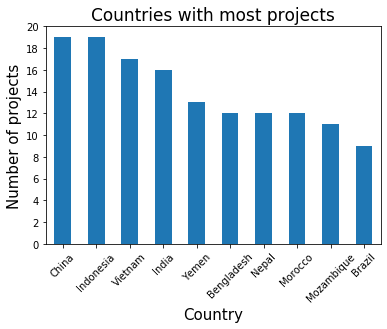

In [47]:
# Now I will graph the 10 countries with the most projects and rename the labels for clarity
table3.plot(kind='bar', legend=None)
plt.title('Countries with most projects', fontsize=17)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Number of projects', fontsize=15)
plt.yticks(np.arange(0,22,2))
plt.xticks(np.arange(10), ['China', 'Indonesia', 'Vietnam', 'India', 'Yemen', 'Bengladesh', 'Nepal', 'Morocco', 'Mozambique', 'Brazil'], rotation=45)
plt.show()

In [48]:
# I will load in the raw json to wrangle the nested fields later
with open(file) as f:
    raw = json.load(f)


In [21]:
# It seems like a one to many relationship between themes (name and code) and id
df_themes = pd.json_normalize(raw, 'mjtheme_namecode', ['id'])

In [22]:
# Some of the projects seem to have multiple theme code's
df_themes.groupby('id').code.nunique().sort_values(ascending=False).head(10)

id
P121152    5
P129652    4
P130749    4
P128284    4
P128573    4
P128891    4
P129688    4
P130174    4
P130459    4
P130471    4
Name: code, dtype: int64

In [23]:
# In order to find top themes we will account for this one to many relationship
print('Top 10 Major World Bank Project Themes:')
df_themes.name.value_counts().head(10)
# looks like [name] missing for some rows

Top 10 Major World Bank Project Themes:


Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [24]:
# create lookup table from code to name
df_themes_name_to_code = df_themes.groupby('name').code.max().sort_values(ascending=False)
# drop the missing name rows
df_themes_name_to_code = df_themes_name_to_code[df_themes_name_to_code.index != '']
# convert to df
df_themes_name_to_code = pd.DataFrame(df_themes_name_to_code,columns=['code'])
# pull name into a column
df_themes_name_to_code['name_clean'] = df_themes_name_to_code.index
# set code to be the index
df_themes_code_to_name = df_themes_name_to_code.set_index(['code'])

# now merge on the name based on the code for the missing projects
print (df_themes.shape)
df_themes_clean = df_themes.merge(df_themes_code_to_name,how='outer',left_on=['code'],right_index=True)
print (df_themes_clean.shape)

(1499, 3)
(1499, 4)


In [25]:
# based on pre cleaned data
print ('Top 10 Major World Bank Project Themes (Original):')
print (df_themes.name.value_counts().head(10))
print ('--------------------------------------------------')

# based on cleaning we have done
print ('Top 10 Major World Bank Project Themes (Cleaned):')
print (df_themes_clean.name_clean.value_counts().head(10))
print ('--------------------------------------------------')

Top 10 Major World Bank Project Themes (Original):
Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64
--------------------------------------------------
Top 10 Major World Bank Project Themes (Cleaned):
Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development   

In [26]:
# get a list of cleaned theme names by id 
df_theme_names = pd.DataFrame(df_themes_clean.groupby('id').apply(lambda x: '|'.join(x['name_clean'])),columns=['theme_names'])
# get s list of theme codes by id
df_theme_codes = pd.DataFrame(df_themes.groupby('id').apply(lambda x: '|'.join(x['code'])),columns=['theme_codes'])
# now make an id level lookup table thsat can be used later to merge to original data
df_theme_lut = df_theme_names.merge(df_theme_codes,left_index=True,right_index=True)
# look at shape
print (df_theme_lut.shape)
# take a look
df_theme_lut.head()

(500, 2)


,theme_names,theme_codes
id,,
P075941,Trade and integration|Social dev/gender/inclus...,4|7|10|5
P085621,Environment and natural resources management|E...,11|7|11|11
P086592,Environment and natural resources management|R...,11|10|10|10
P094183,Trade and integration|Trade and integration|Ru...,10|5|5
P095003,Trade and integration|Rural development,5|10


In [49]:
# merge back out cleaned fields into the original data
df_cleaned = json_df.merge(df_theme_lut,how='right',left_on=['id'],right_index=True,)

# make sure shape has has not changed
print (json_df.shape)
print (df_cleaned.shape)
# we expect to just see the addition of 2 cols

# take a look at the fields to see the cleaning we have done
df_cleaned[['id','mjtheme_namecode','theme_names','theme_codes']].head(10)

(500, 50)
(500, 52)


,id,mjtheme_namecode,theme_names,theme_codes
0,P129828,"[{'code': '8', 'name': 'Human development'}, {...",Human development|Environment and natural reso...,8|11
1,P144674,"[{'code': '1', 'name': 'Economic management'},...",Economic management|Social protection and risk...,1|6
2,P145310,"[{'code': '5', 'name': 'Trade and integration'...",Environment and natural resources management|S...,5|2|11|6
3,P144665,"[{'code': '7', 'name': 'Social dev/gender/incl...",Social dev/gender/inclusion|Social dev/gender/...,7|7
4,P144933,"[{'code': '5', 'name': 'Trade and integration'...",Trade and integration|Financial and private se...,5|4
5,P146161,"[{'code': '6', 'name': 'Social protection and ...",Social protection and risk management|Social p...,6|6
6,P121185,"[{'code': '2', 'name': 'Public sector governan...",Public sector governance|Financial and private...,2|4
7,P127033,"[{'code': '11', 'name': 'Environment and natur...",Human development|Environment and natural reso...,11|8
8,P130164,"[{'code': '10', 'name': 'Rural development'}, ...",Social dev/gender/inclusion|Rural development,10|7
9,P130903,"[{'code': '2', 'name': 'Public sector governan...",Public sector governance|Public sector governa...,2|2|2
